In [2]:
%matplotlib inline
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import matplotlib.pyplot as plt
import cartopy
import cartopy.feature as cfeature

In [3]:
import sys
sys.path.append("../scripts/twitter")
from searchTwitter import TwitterDataFrame, TwitterSearchTerm
import utils as ut

In [6]:
# Let's start with this base model
words = [
    "((fire OR fires) ash)",
    "((fire OR fires) particulate)",
    "((fire OR fires) air pollution)",
    "((fire OR fires) air quality)",
    "((fire OR fires) smog)",
    "((fire OR fires) haze)",
    "(smoke (fire OR fires))",
    "(wild (fire OR fires))",
    "wildfire",
    "wildfires",
    "(forest (fire OR fires))"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
wf_search = TwitterSearchTerm(query_term, "2021-12-01T00:00:00z","2022-01-03T00:00:00z")
wf_df = wf_search.get_term_count()

Total tweets for query (((fire OR fires) ash) OR ((fire OR fires) particulate) OR ((fire OR fires) air pollution) OR ((fire OR fires) air quality) OR ((fire OR fires) smog) OR ((fire OR fires) haze) OR (smoke (fire OR fires)) OR (wild (fire OR fires)) OR wildfire OR wildfires OR (forest (fire OR fires))) -has:links -is:retweet has:geo -has:media place_country:us :
989


In [6]:
# Let's look at the health related tweets.
words = [
    "breathe",
    "asthma",
    "lungs",
    "cough",
    "headache",
    "(itchy eyes)",
    "(sore throat)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet has:geo -has:media place_country:us"
health_search = TwitterSearchTerm(query_term, "2021-12-01T00:00:00z","2022-01-03T00:00:00z")
health_df = health_search.get_term_count()

Total tweets for query (breathe OR asthma OR lungs OR cough OR headache OR (itchy eyes) OR (sore throat)) -has:links -is:retweet has:geo -has:media place_country:us :
9787


WF
Health


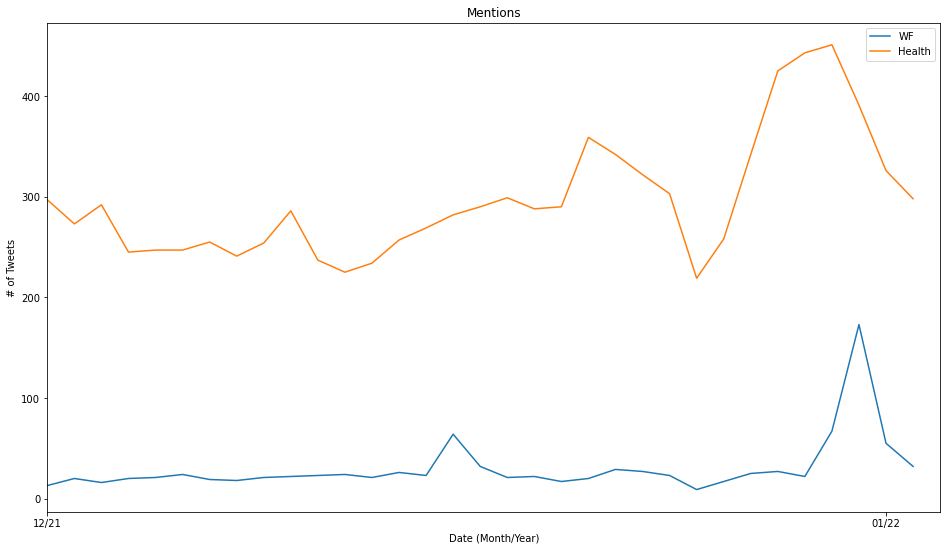

In [9]:
ut.graph_tweet_count([wf_df, health_df],datetime(2021,12,1), datetime(2022,1,3), labels=['WF','Health'])

In [10]:
wf_tweets = wf_search.get_tweets()

Making request 1 of 2
Making request 2 of 2
Query finished


In [11]:
wf_tweets

,id,text,geo,created_at,lat,lon
0,1477789529482436608,Wow! With all the chaos going on in today's wo...,{'place_id': 'a31243bab241a105'},2022-01-02T23:50:54.000Z,41.978038,-71.539542
1,1477781859585212419,Just in at @CBSNews Smoky the bear started a f...,{'place_id': 'd005216d96068a62'},2022-01-02T23:20:25.000Z,40.421513,-74.118344
2,1477733107394564103,@BggMinty Will it work with smoke in air fro. ...,{'place_id': 'ffd9b96d46c01672'},2022-01-02T20:06:42.000Z,40.683483,-76.272734
3,1477723277992685568,We have spare laptops for students who lost th...,{'place_id': '36148a9a49d3da69'},2022-01-02T19:27:38.000Z,39.838926,-105.015543
4,1477720636004962306,@knicoles528 Lower smoke point for frying thin...,{'place_id': '9807c5c5f7a2c6ce'},2022-01-02T19:17:09.000Z,43.499362,-97.239256
...,...,...,...,...,...,...
984,1466048081435189251,@FbStutsman @wildfire_coach @Kelvin_Gilliam2 @...,{'place_id': '344b25bca5f9cdc5'},2021-12-01T14:14:35.000Z,32.716432,-97.839791
985,1466048005493121028,@wildfire_coach @Kelvin_Gilliam2 @stripling_de...,{'place_id': '344b25bca5f9cdc5'},2021-12-01T14:14:17.000Z,32.716432,-97.839791
986,1465909276954685444,SMOKEA - SMOKE INVESTIGATION OUTSIDE A STRUCTU...,"{'place_id': 'ac88a4f17a51c7fc', 'coordinates'...",2021-12-01T05:03:01.000Z,45.479494,-122.694013
987,1465906259538948099,Highland &amp; North Evans | 23:39 | Erie Co. ...,{'place_id': 'd3f378f122d4f4a7'},2021-12-01T04:51:02.000Z,42.863516,-78.799913


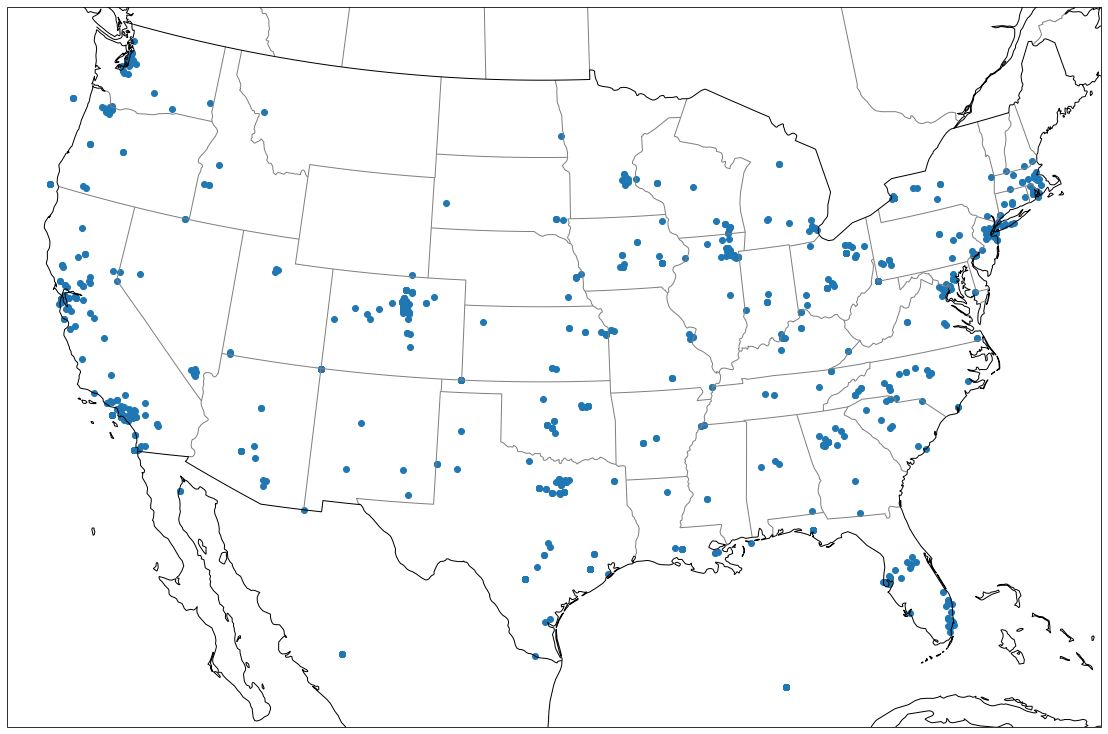

In [12]:
ut.plot_tweets([wf_tweets])

In [13]:
health_tweets = health_search.get_tweets()

Making request 1 of 20
Making request 2 of 20
Making request 3 of 20
Making request 4 of 20
Making request 5 of 20
Making request 6 of 20
Making request 7 of 20
Making request 8 of 20
Making request 9 of 20
Making request 10 of 20
Making request 11 of 20
Making request 12 of 20
Making request 13 of 20
Making request 14 of 20
Making request 15 of 20
Making request 16 of 20
Making request 17 of 20
Making request 18 of 20
Making request 19 of 20
Making request 20 of 20
Query finished


No handles with labels found to put in legend.


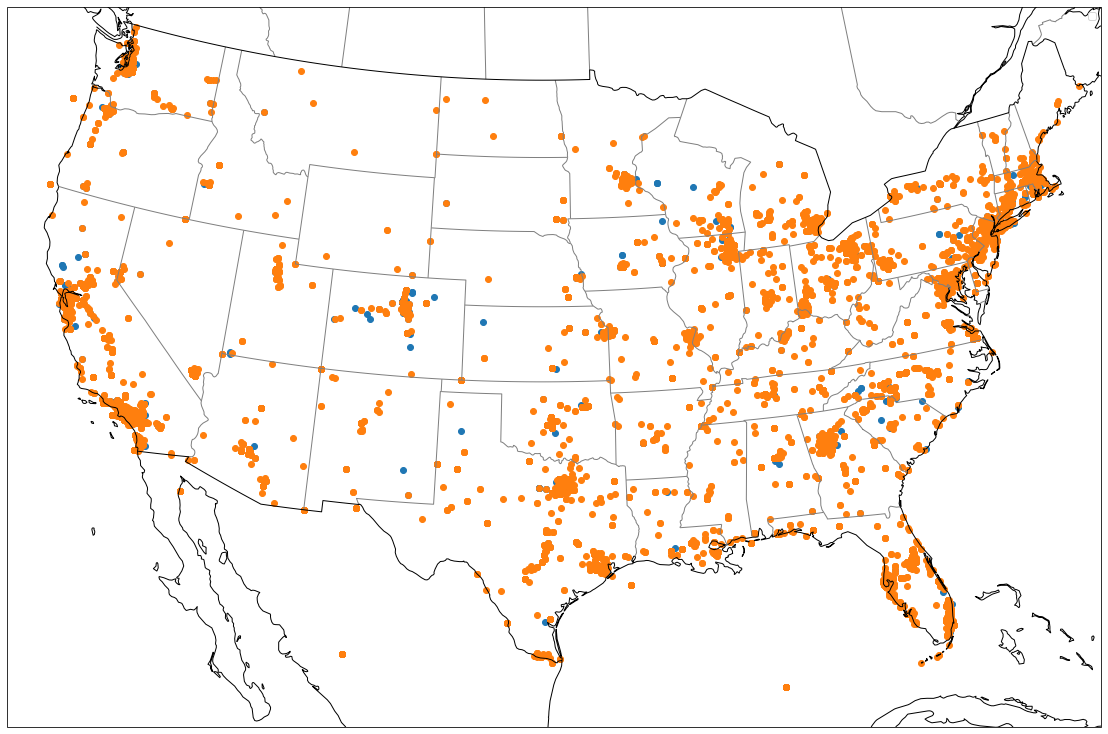

In [16]:
ut.plot_tweets([wf_tweets, health_tweets])


In [23]:
# Let's restrict the area to only look at tweets in Colorado

co_wf = wf_tweets[(wf_tweets['lon'] > -109) & (wf_tweets['lon'] < -102) & (wf_tweets['lat'] < 41) & (wf_tweets['lat'] > 37)]
co_health = health_tweets[(health_tweets['lon'] > -109) & (health_tweets['lon'] < -102)& (health_tweets['lat'] < 41) & (health_tweets['lat'] > 37)]

In [53]:
co_wf

,id,text,geo,created_at,lat,lon
3,1477723277992685568,We have spare laptops for students who lost th...,{'place_id': '36148a9a49d3da69'},2022-01-02T19:27:38.000Z,39.838926,-105.015543
8,1477677508799578119,@laflaca428 @mikelowetpt @PurseDreams So that'...,{'place_id': 'b49b3053b5c25bf5'},2022-01-02T16:25:46.000Z,39.614151,-105.109815
21,1477484692555243520,@RobertHurst157 @PiperBayard Interesting consi...,{'place_id': 'fd70c22040963ac7'},2022-01-02T03:39:35.000Z,39.953552,-105.301776
22,1477471911428775936,@M4A_Weathergeek @girlpower1321 @Clarja_wewon ...,{'place_id': '910868722e1e4825'},2022-01-02T02:48:48.000Z,39.563868,-105.062023
27,1477448734057418754,"@tylerhall Over here in Colorado, my apartment...",{'place_id': '3f871475c095f94f'},2022-01-02T01:16:42.000Z,39.819133,-105.148925
...,...,...,...,...,...,...
884,1467972216813809665,"Let it snoooow! Let it snooooow, we shouldn’t ...",{'place_id': 'f7eb2fa2fea288b1'},2021-12-06T21:40:24.000Z,39.609730,-105.193475
901,1467627561341521921,@RockyMountViews Achooo! Wind=dust but it is c...,{'place_id': '2736a5db074e8201'},2021-12-05T22:50:52.000Z,40.125504,-105.178564
910,1467565547823022084,"I know our wildfire season is year round now, ...",{'place_id': '00d9cec21aec392a'},2021-12-05T18:44:27.000Z,38.717559,-104.767018
913,1467555722460344327,#MinersCandleFire en Route for media coverage ...,{'place_id': 'f7eb2fa2fea288b1'},2021-12-05T18:05:24.000Z,39.609730,-105.193475


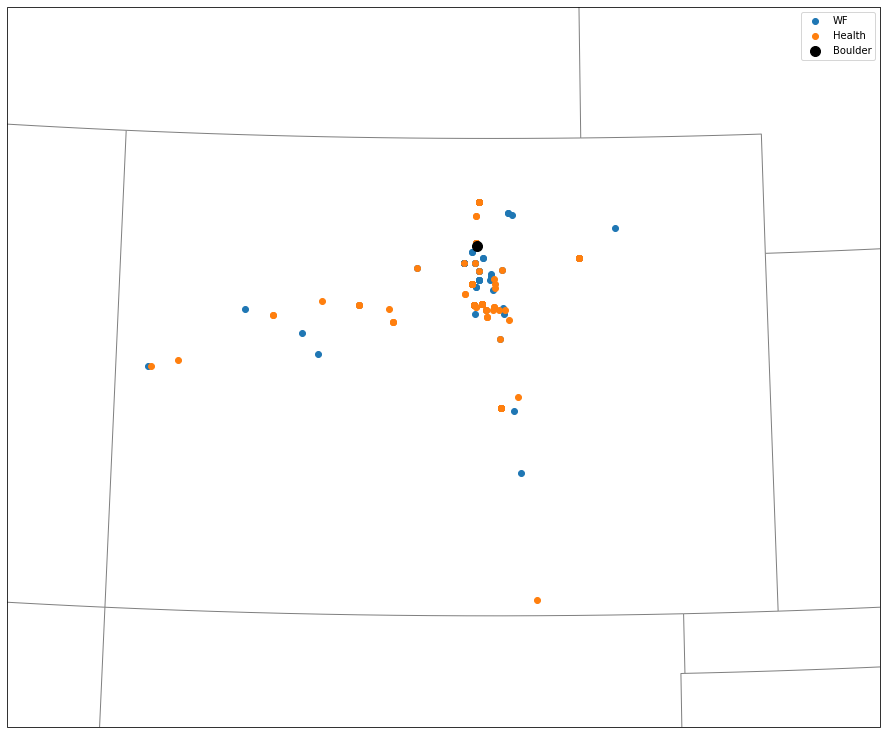

In [48]:
fig = plt.figure(figsize=(20,10))
img_extent = (-110, -101, 36, 42)
ax = fig.add_axes([0,0,1,1], 
                  projection=cartopy.crs.LambertConformal(central_longitude=-105))
ax.set_extent(img_extent, cartopy.crs.Geodetic())

state_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')

ax.add_feature(state_provinces, edgecolor='gray')

ax.scatter(co_wf['lon'], co_wf['lat'], transform=cartopy.crs.PlateCarree(), label='WF')
ax.scatter(co_health['lon'], co_health['lat'], transform=cartopy.crs.PlateCarree(), label='Health')
ax.scatter(-105.17, 40.1, transform=cartopy.crs.PlateCarree(), s=100, c='black', label="Boulder")
ax.legend()

In [52]:
co_health.to_csv('co_health.csv')

In [55]:
wf_tweets['geo'][986]

{'place_id': 'ac88a4f17a51c7fc',
 'coordinates': {'type': 'Point', 'coordinates': [-122.694013, 45.479494]}}

In [58]:
# Let's start with this base model
words = [
"((fire OR fires) ash)",
    "((fire OR fires) particulate)",
    "((fire OR fires) air pollution)",
    "((fire OR fires) air quality)",
    "((fire OR fires) smog)",
    "((fire OR fires) haze)",
    "(smoke (fire OR fires))",
    "(wild (fire OR fires))",
    "wildfire",
    "wildfires",
    "(forest (fire OR fires))"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet -has:media"
wf_search = TwitterSearchTerm(query_term, "2021-12-01T00:00:00z","2022-01-03T00:00:00z")
wf_df = wf_search.get_term_count()

Total tweets for query (((fire OR fires) ash) OR ((fire OR fires) particulate) OR ((fire OR fires) air pollution) OR ((fire OR fires) air quality) OR ((fire OR fires) smog) OR ((fire OR fires) haze) OR (smoke (fire OR fires)) OR (wild (fire OR fires)) OR wildfire OR wildfires OR (forest (fire OR fires))) -has:links -is:retweet -has:media :
80777


WF


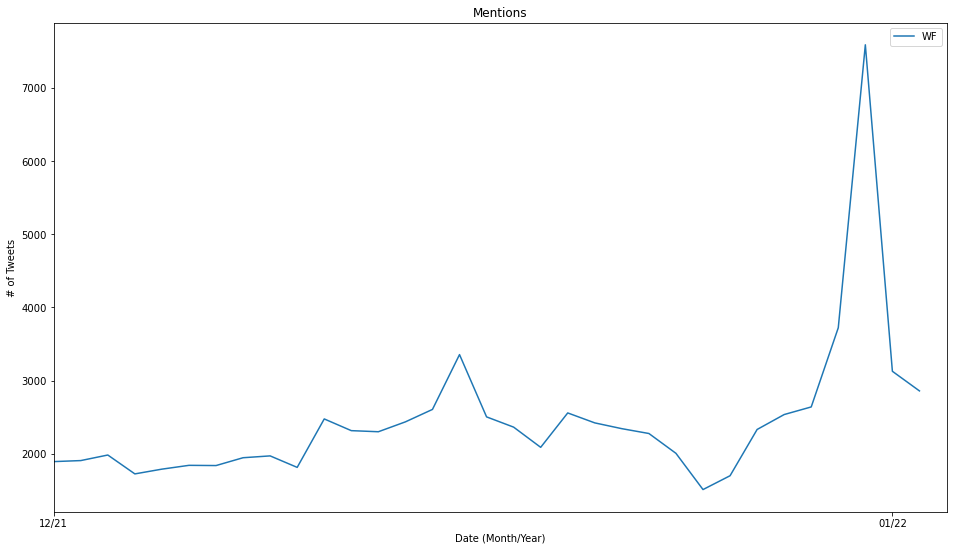

In [59]:
ut.graph_tweet_count([wf_df],datetime(2021,12,1), datetime(2022,1,3), labels=['WF'])

In [60]:
# Let's look at the health related tweets.
words = [
    "breathe",
    "asthma",
    "lungs",
    "cough",
    "headache",
    "(itchy eyes)",
    "(sore throat)"
]
query_term = "("+" OR ".join(words)+") -has:links -is:retweet -has:media"
health_search = TwitterSearchTerm(query_term, "2021-12-01T00:00:00z","2022-01-03T00:00:00z")
health_df = health_search.get_term_count()

Total tweets for query (breathe OR asthma OR lungs OR cough OR headache OR (itchy eyes) OR (sore throat)) -has:links -is:retweet -has:media :
1158477


WF
Health


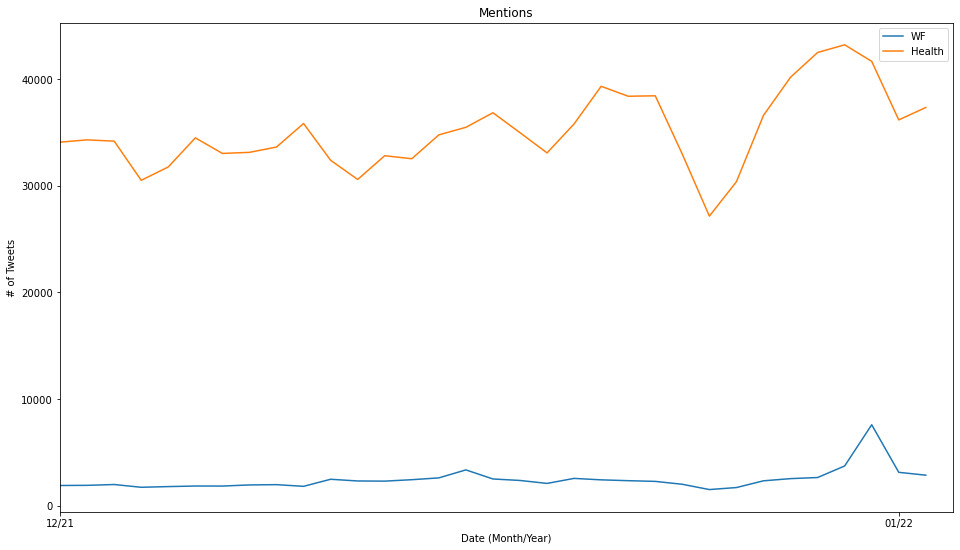

In [61]:
ut.graph_tweet_count([wf_df, health_df],datetime(2021,12,1), datetime(2022,1,3), labels=['WF','Health'])